# Forcasting _gold_price dataset is taken from kaggle

### Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

### load dataset

In [2]:
dt = pd.read_csv("goldprice.csv")

In [3]:
dt.head()

,Date,Price
0,1950-01,34.73
1,1950-02,34.73
2,1950-03,34.73
3,1950-04,34.73
4,1950-05,34.73


In [5]:
dt.tail()

,Date,Price
874,2022-11,1725.07
875,2022-12,1797.55
876,2023-01,1897.71
877,2023-02,1854.54
878,2023-03,1912.73


In [4]:
dt.shape

(879, 2)

In [7]:
print(f"Date range of gold prices available from - {dt.loc[:,'Date'][0]} to {dt.loc[:,'Date'][len(dt) -1]}")

Date range of gold prices available from - 1950-01 to 2023-03


In [8]:
date = pd.date_range(start = '1/1/1950', end = '4/1/2023',freq='M')
date

DatetimeIndex(['1950-01-31', '1950-02-28', '1950-03-31', '1950-04-30',
               '1950-05-31', '1950-06-30', '1950-07-31', '1950-08-31',
               '1950-09-30', '1950-10-31',
               ...
               '2022-06-30', '2022-07-31', '2022-08-31', '2022-09-30',
               '2022-10-31', '2022-11-30', '2022-12-31', '2023-01-31',
               '2023-02-28', '2023-03-31'],
              dtype='datetime64[ns]', length=879, freq='M')

In [9]:
dt['month'] = date
dt.drop('Date', axis =1, inplace= True)
dt = dt.set_index('month')
dt.head()

,Price
month,
1950-01-31,34.73
1950-02-28,34.73
1950-03-31,34.73
1950-04-30,34.73
1950-05-31,34.73


### plot graph

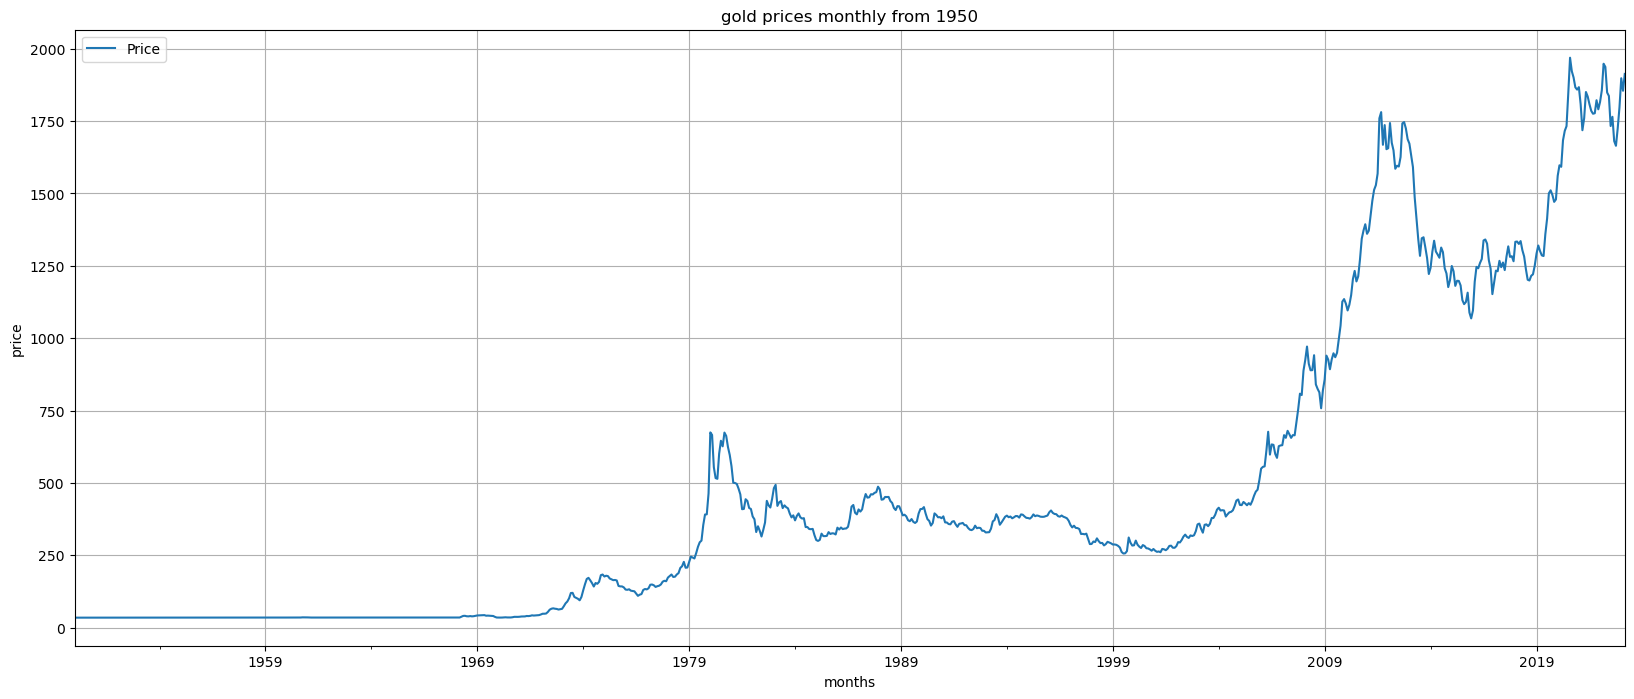

In [11]:
dt.plot(figsize=(20,8))
plt.title("gold prices monthly from 1950")
plt.xlabel("months")
plt.ylabel('price')
plt.grid();

#summary of given dataset

In [12]:
round(dt .describe () , 3)

,Price
count,879.000
mean,467.816
std,517.823
min,34.490
25%,35.355
50%,330.410
75%,511.845
max,1968.630


## box plot 

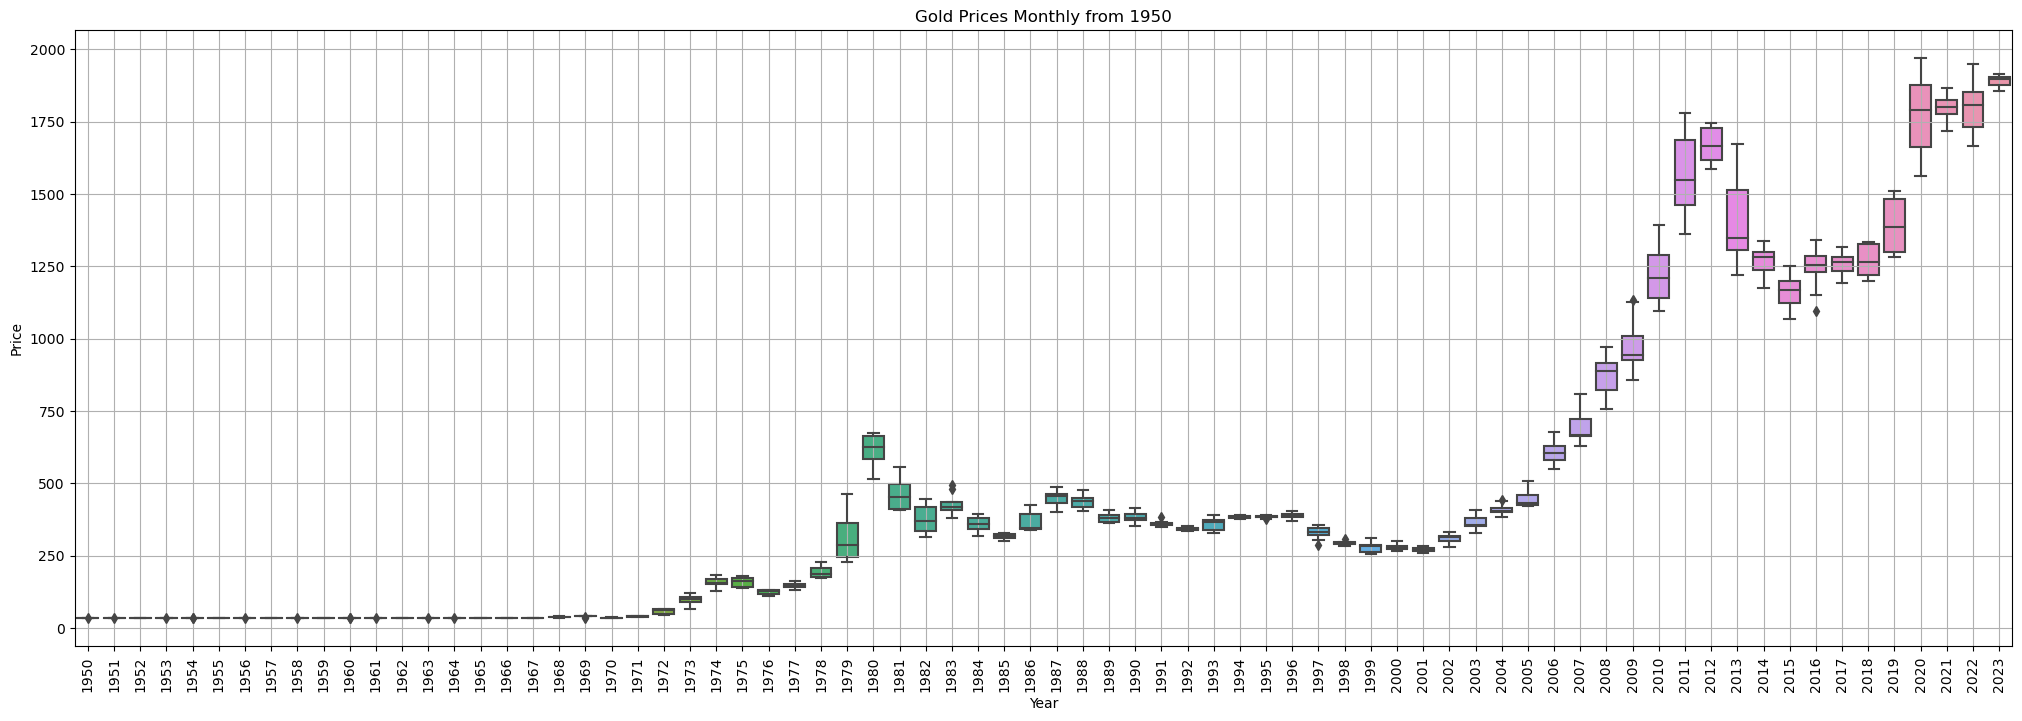

In [13]:
_, ax = plt.subplots(figsize=(25, 8))
sns.boxplot(x=dt.index.year, y=dt.values[:, 0], ax=ax)

# Set title, labels, and rotation for x-axis ticks
plt.title('Gold Prices Monthly from 1950')
plt.xlabel('Year')
plt.ylabel('Price')
plt.xticks(rotation=90)

# Add gridlines
plt.grid()


## Monthly subplot

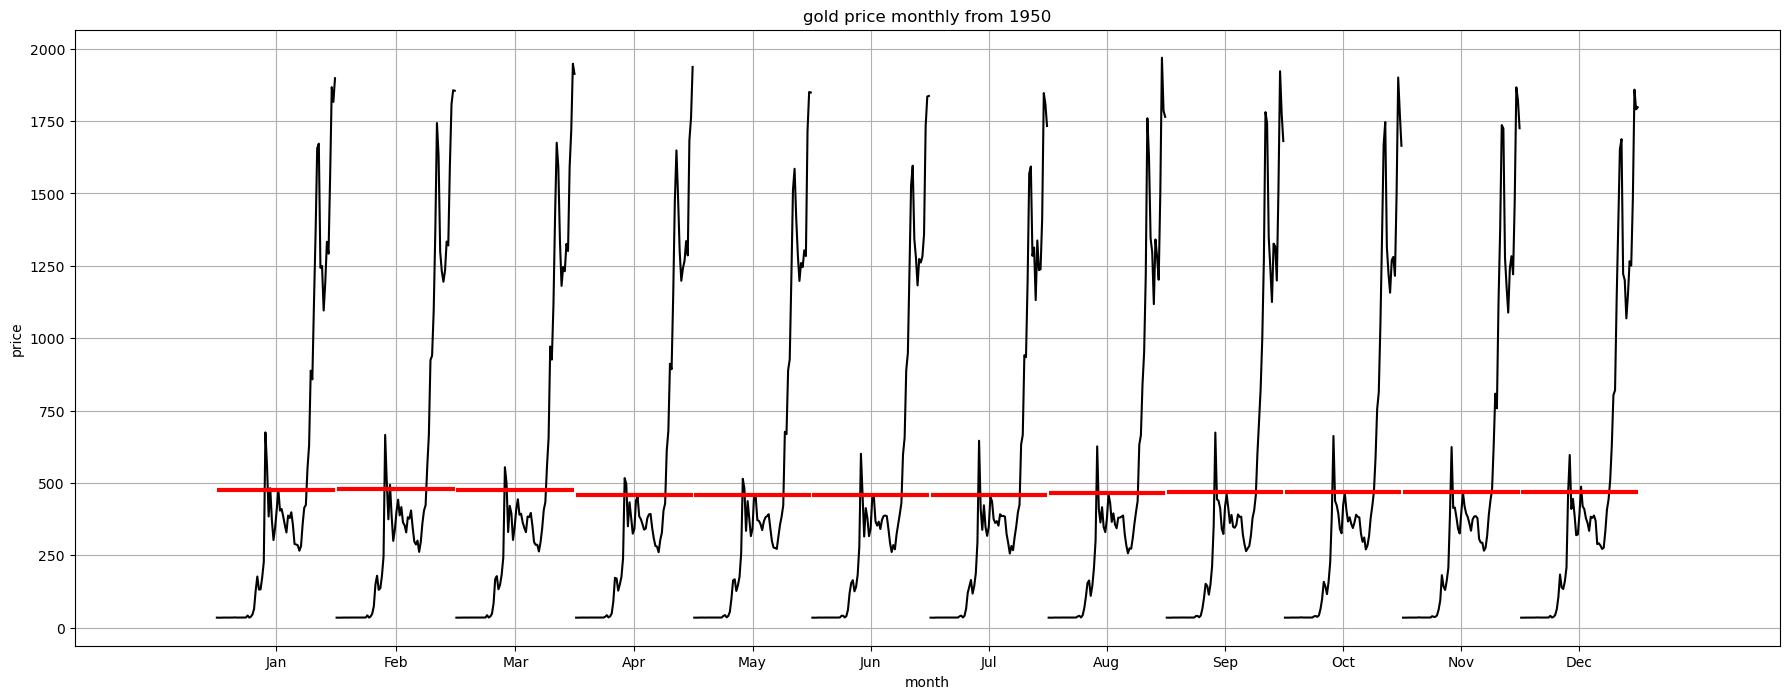

In [14]:
from statsmodels.graphics.tsaplots import month_plot
fig, ax = plt.subplots(figsize= (22,8))
month_plot(dt, ylabel = ' gold price', ax= ax)
plt. title('gold price monthly from 1950')
plt.xlabel('month')
plt.ylabel('price')
plt.grid()

### Monthly subplots

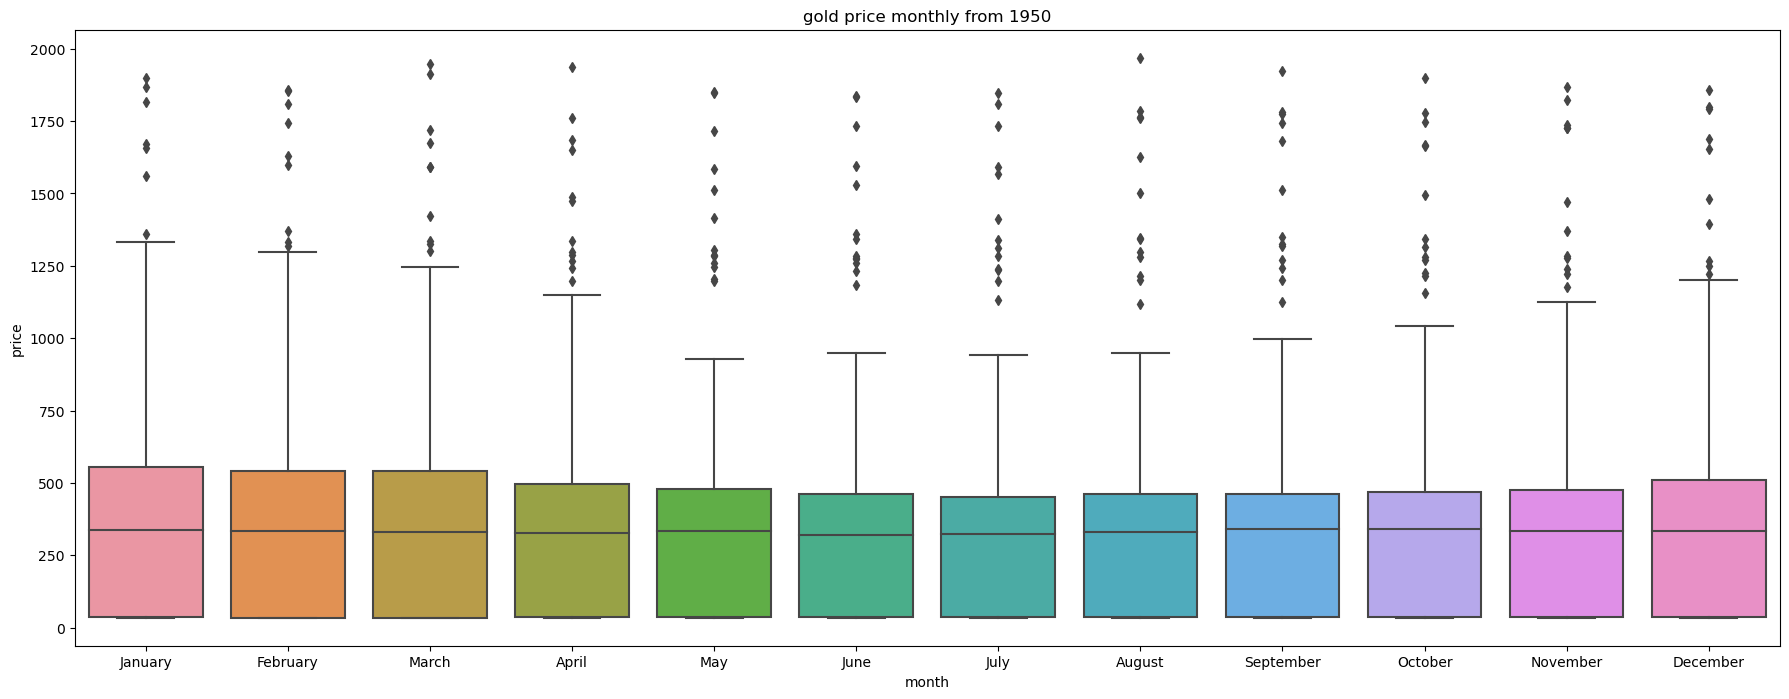

In [15]:
_, ax = plt.subplots (figsize= (22, 8))
sns.boxplot(x = dt. index.month_name (), y = dt.values[:, 0], ax = ax)
plt.title('gold price monthly from 1950' )
plt.xlabel("month")
plt.ylabel ('price')
plt.show()

### Yearly_Resampling 

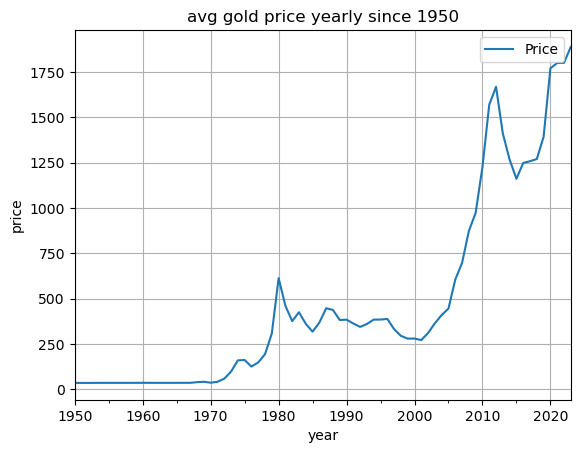

In [16]:
dt_yearly_sum = dt.resample ('A').mean ()
dt_yearly_sum.plot();
plt.title("avg gold price yearly since 1950")
plt.xlabel('year')
plt.ylabel('price')
plt.grid();

### Quarterly_resampling

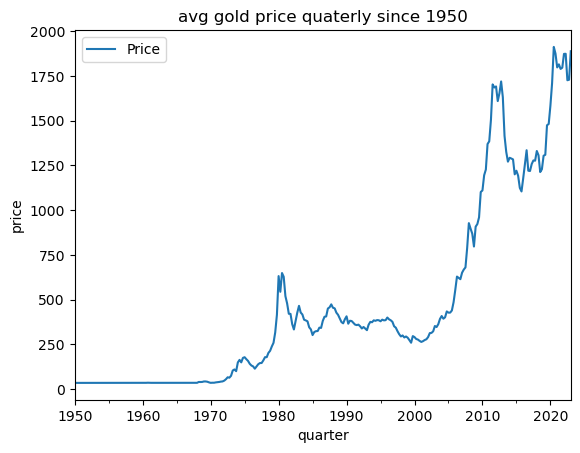

In [17]:

dt_quarterly_sum = dt.resample('Q').mean()
dt_quarterly_sum.plot();
plt.title("avg gold price quaterly since 1950")
plt.xlabel('quarter')
plt.ylabel('price')
plt.show();

## Decade_resampling

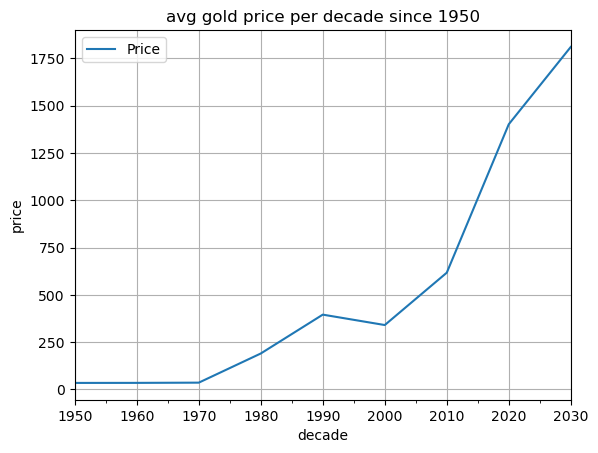

In [18]:
dt_decade_sum = dt.resample('10Y'). mean()
dt_decade_sum.plot();
plt.title('avg gold price per decade since 1950')
plt.xlabel('decade')
plt.ylabel('price')
plt.grid();

In [19]:
dt_1 = dt.groupby(dt.index .year).mean ().rename(columns= {'Price': 'Mean'})
dt_1 = dt_1.merge(dt.groupby(dt.index.year).std().rename(columns={'Price':'Std'}), left_index = True , right_index= True)
dt_1['Cov_pct']= ((dt_1['Std']/dt_1["Mean"])*100).round(2)
dt_1.head()

,Mean,Std,Cov_pct
month,,,
1950,34.729167,0.002887,0.01
1951,34.717500,0.020057,0.06
1952,34.628333,0.117538,0.34
1953,34.879167,0.056481,0.16
1954,35.020000,0.082792,0.24


### Yearly avg Gold_price

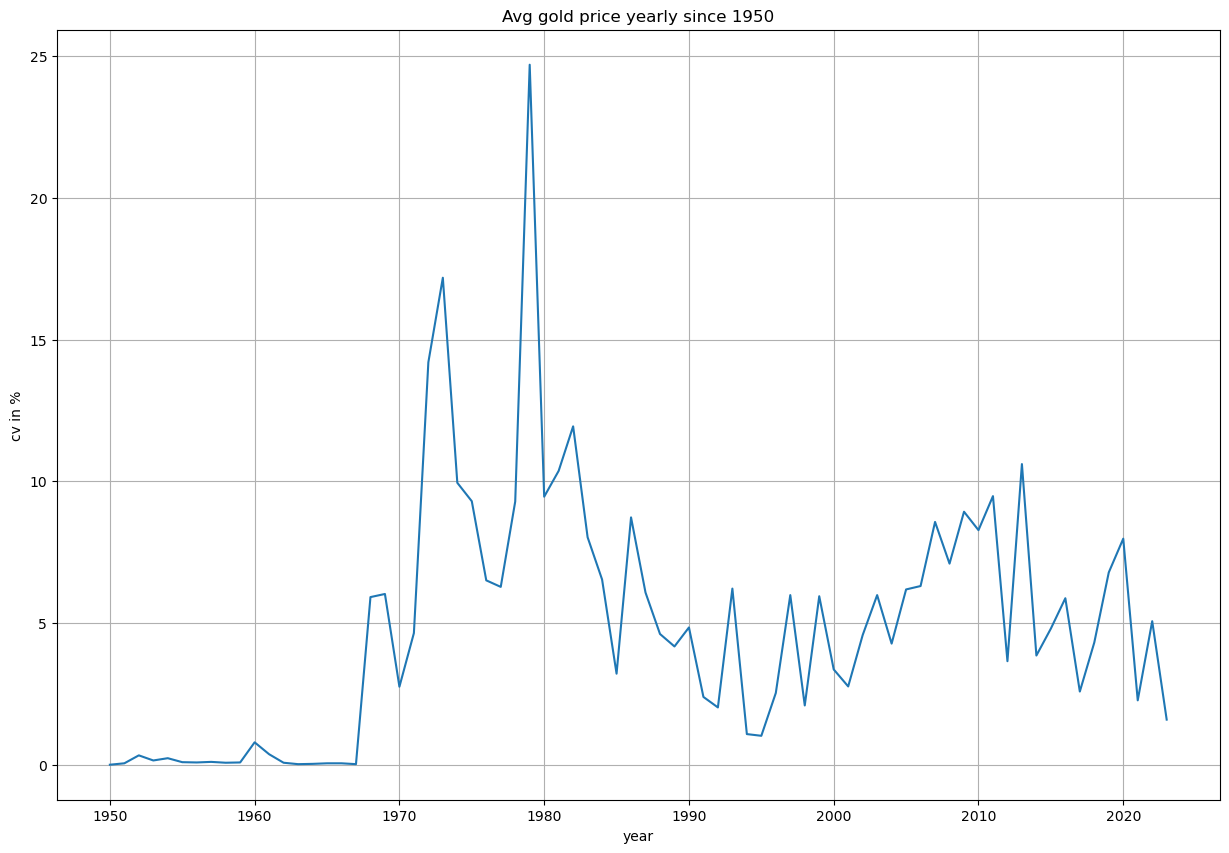

In [20]:
fig, ax= plt.subplots(figsize= (15,10))
dt_1['Cov_pct'].plot();
plt.title("Avg gold price yearly since 1950")
plt.xlabel ('year')
plt.ylabel('cv in %')
plt.grid()

# split dataset into train and test

In [21]:
#consider below 2017 train dataset, and above 2017 test dataset
train = dt[dt.index.year <= 2017]
test = dt[dt.index.year > 2017]
print(train.shape)
print(test.shape)


(816, 1)
(63, 1)


<function matplotlib.pyplot.show(close=None, block=None)>

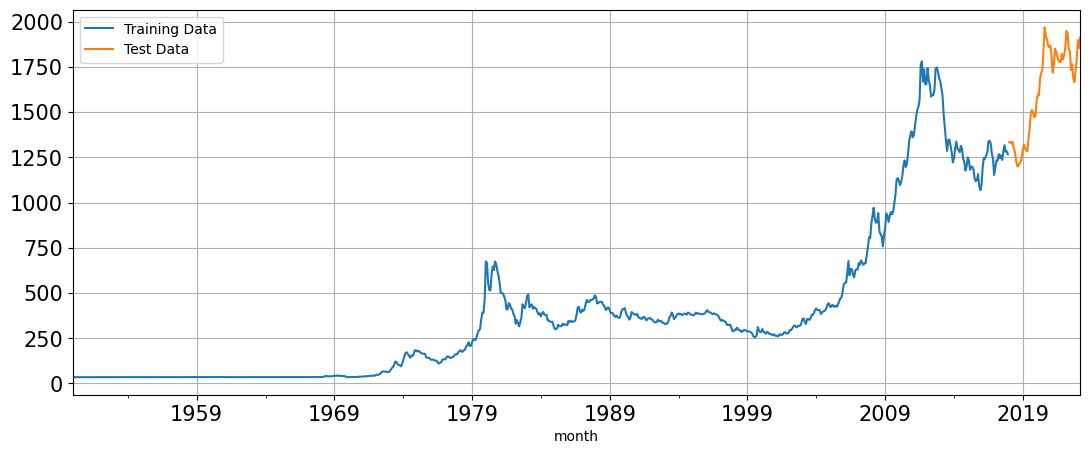

In [22]:
train["Price"].plot(figsize=(13,5), fontsize = 15)
test["Price"].plot(figsize=(13,5), fontsize = 15)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show

In [23]:
train_time = [i+1 for i in range(len (train))]
test_time = [i+len(train)+1 for i in range(len (test))]
len(train_time), len(test_time)

(816, 63)

### linear regression

In [24]:
LR_train = train.copy()
LR_test = test.copy()

In [25]:
LR_train['time']= train_time
LR_test['time']= test_time

In [26]:
lr = LinearRegression()
lr.fit(LR_train[['time']],LR_train["Price"].values)

LinearRegression()

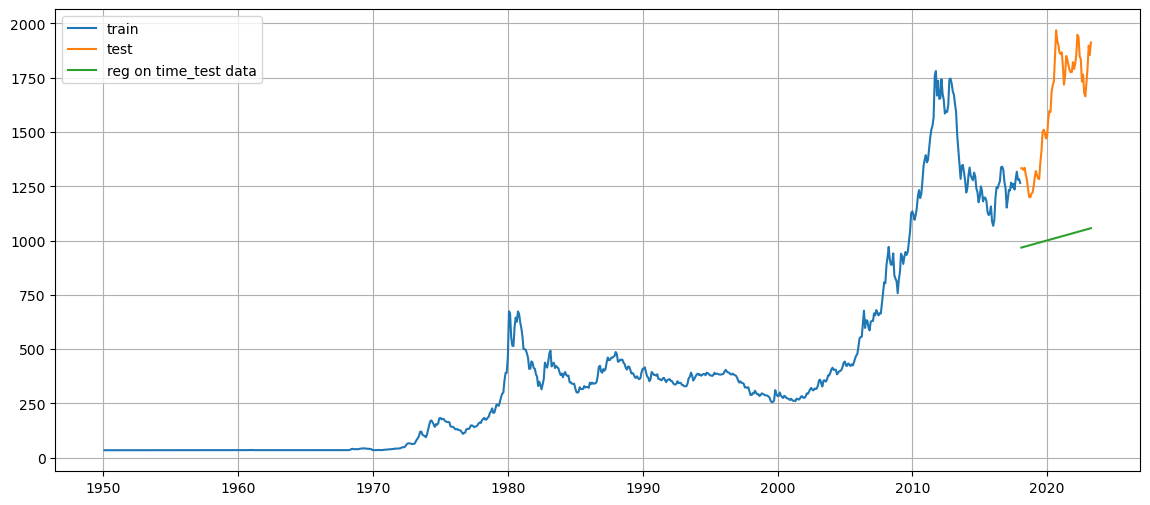

In [27]:
test_predictions_model1 = lr.predict(LR_test[["time"]])
LR_test['forecast'] = test_predictions_model1

plt.figure(figsize = (14,6))
plt.plot(train['Price'], label = "train")
plt.plot(test["Price"],label = 'test')
plt.plot(LR_test['forecast'], label = 'reg on time_test data')
plt. legend(loc = 'best')
plt.grid()

In [28]:
def mape(actual, pred):
    return round((np. mean(abs(actual - pred)/ actual))*100, 2)

### Mean absolute percentage error

In [29]:
mape_model1_test = mape(test['Price'].values, test_predictions_model1)
print("MAPE is %3.3f" % mape_model1_test, "%")

MAPE is 36.140 %


In [30]:
results = pd.DataFrame({'Test Mape (%)': [mape_model1_test]}, index= ["RegressionOnTime"])
results

,Test Mape (%)
RegressionOnTime,36.14


## Naive forcasting Model 

In [31]:
Naive_train = train.copy()
Naive_test = test.copy()

In [32]:
Naive_test['naive'] = np.asarray(train['Price'])[len(np.asarray(train['Price']))-1]
Naive_test['naive'].head()

month
2018-01-31    1265.67
2018-02-28    1265.67
2018-03-31    1265.67
2018-04-30    1265.67
2018-05-31    1265.67
Name: naive, dtype: float64

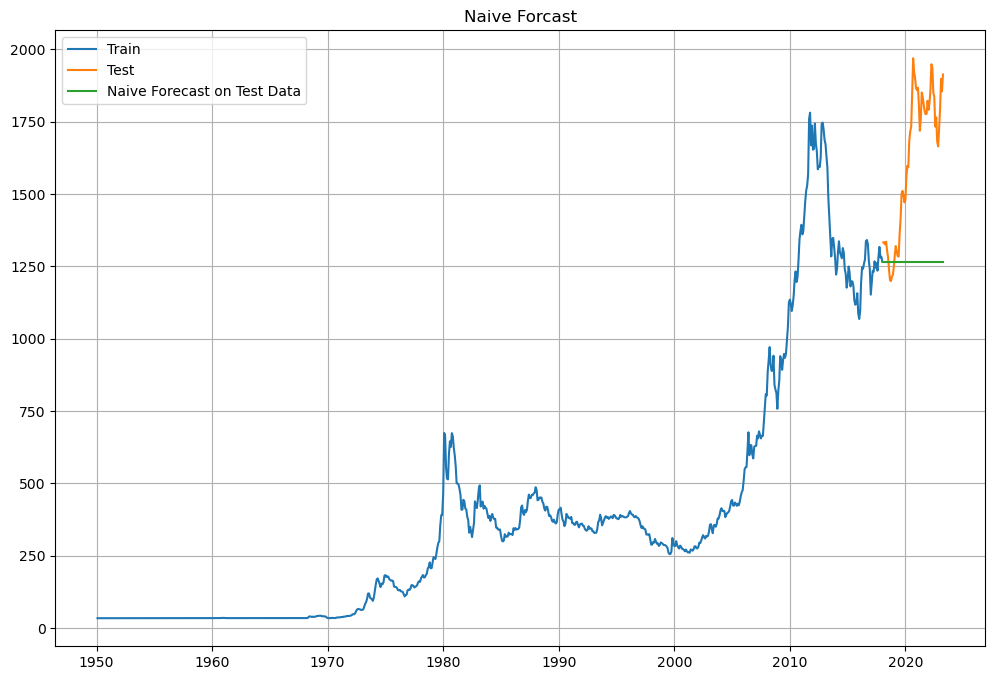

In [33]:
plt.figure(figsize= (12,8))
plt.plot(Naive_train['Price'], label= 'Train') 
plt.plot(test['Price'], label= 'Test') 
plt.plot(Naive_test['naive'], label= 'Naive Forecast on Test Data')
plt.legend(loc ="best")
plt.title("Naive Forcast")
plt.grid()


In [34]:
mape_model2_test = mape(test['Price'].values, Naive_test['naive'].values)
print("For Naive forecast on the Test Data, MAPE is %3.3f" % (mape_model2_test), "%")



For Naive forecast on the Test Data, MAPE is 20.580 %


In [35]:
resultsDf_2 = pd.DataFrame({'Test MAPE (%)': [mape_model2_test]},index= ['NaiveModel1'])
results = pd.concat([results, resultsDf_2])
results                          

,Test Mape (%),Test MAPE (%)
RegressionOnTime,36.14,NaN
NaiveModel1,NaN,20.58


## Exponential smothing for time series forcasting

In [36]:
final_model = ExponentialSmoothing(dt, trend = 'additive',seasonal = 'additive').fit(smoothing_level = 0.4,
                                                                                     smoothing_trend = 0.3,
                                                                                     smoothing_seasonal = 0.6)

In [37]:
Mape_final_model = mape(dt['Price'].values, final_model.fittedvalues)

print("MAPE:", Mape_final_model)

MAPE: 15.13


In [38]:
predictions = final_model.forecast(steps=len(test))

In [39]:
pred_dt = pd.DataFrame ( {'lower_CI': predictions-1.96*np.std(final_model.resid,ddof=1),
                          'prediction':predictions,
                          'upper_CI': predictions+1.96*np.std(final_model.resid,ddof=1)})
pred_dt.head()

,lower_CI,prediction,upper_CI
2023-04-30,1767.042687,1891.330377,2015.618067
2023-05-31,1820.396377,1944.684067,2068.971757
2023-06-30,1951.165539,2075.453229,2199.740919
2023-07-31,2029.545841,2153.833531,2278.121221
2023-08-31,2221.348249,2345.635939,2469.923629


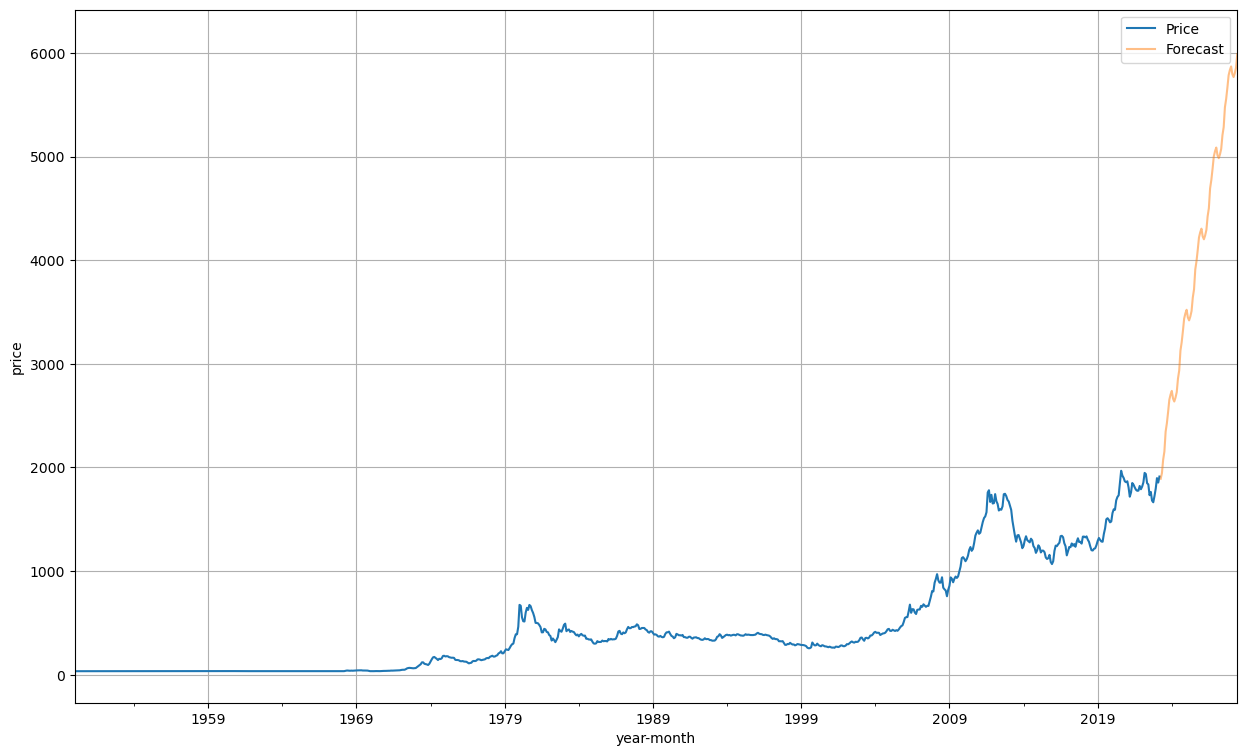

In [40]:
axis = dt.plot(label = 'Actual', figsize=(15,9))
pred_dt['prediction'].plot(ax= axis, label ='Forecast', alpha =0.5)
axis.fill_between(pred_dt.index, pred_dt['lower_CI'], pred_dt['upper_CI'], color ='m' ,alpha = .15)
axis.set_xlabel('year-month')
axis.set_ylabel('price') 
plt. legend(loc ='best')
plt.grid()
plt.show()



# LMST


In [41]:
#LMST

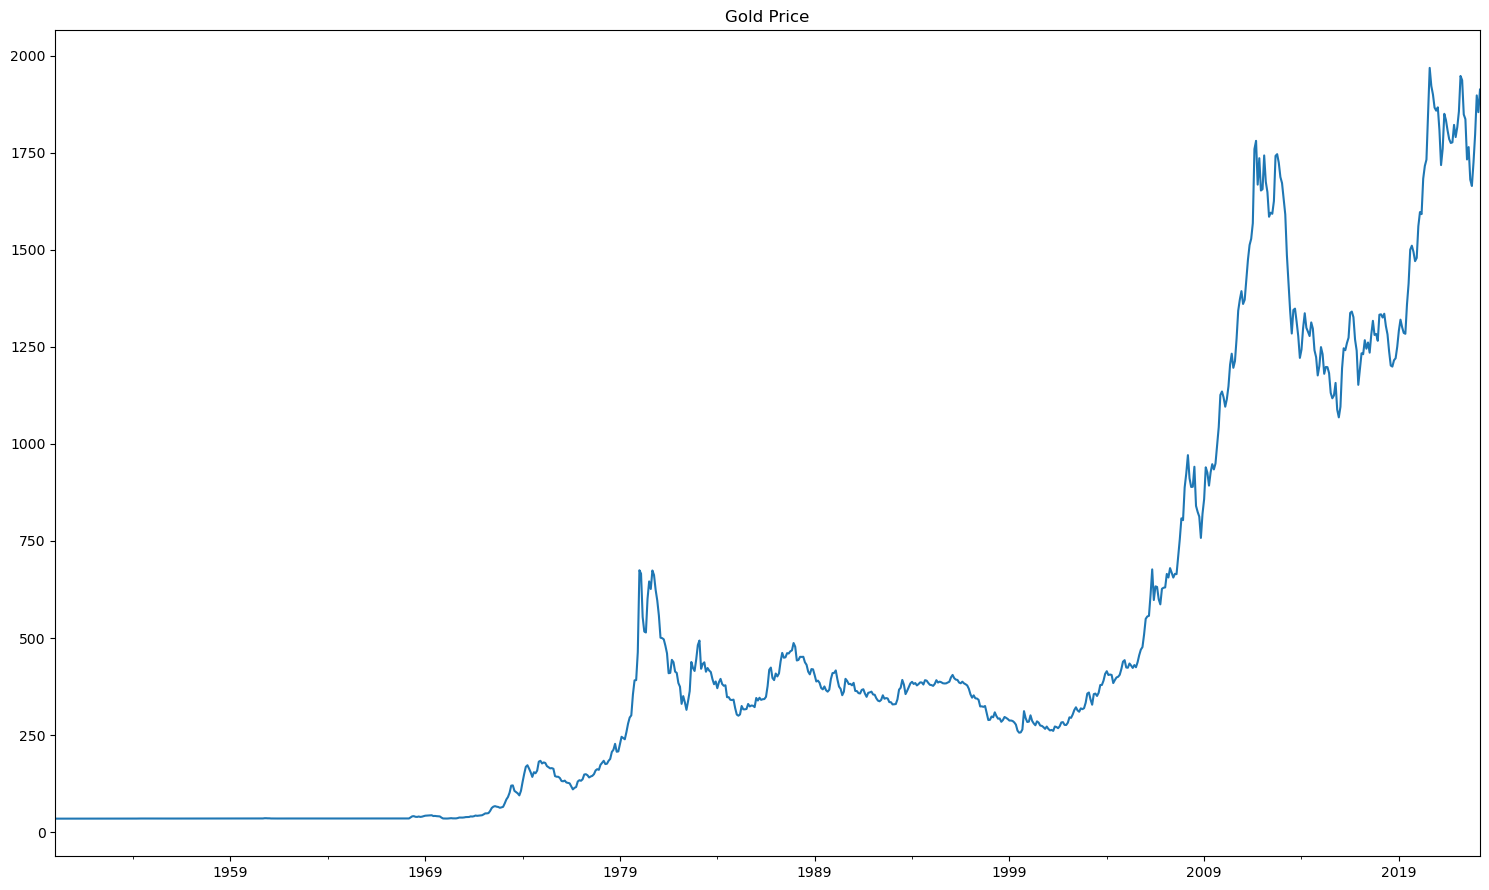

In [42]:
plt.figure(figsize=(15, 9))
dt['Price'].plot()
plt.ylabel(None)
plt.xlabel(None)
plt.title("Gold Price")
plt.tight_layout()
plt.show()

In [43]:
n_cols = 1
dataset = dt["Price"]
dataset = pd.DataFrame(dataset)
data = dataset.values

data.shape


(879, 1)

In [44]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range= (0, 1))
scaled_data = scaler.fit_transform(np.array(data))

In [45]:
# 75% to Train , 25% to Test
train_size = int(len(data) * 0.75)
test_size = len(data) - train_size
print("Train Size :",train_size,"Test Size :",test_size)

Train Size : 659 Test Size : 220


In [46]:
train_data = scaled_data[0:train_size, :]
train_data.shape

(659, 1)

In [47]:
# Creating a Training set with 60 time-steps
x_train = []
y_train = []
time_steps = 100
n_cols = 1

for i in range(time_steps, len(train_data)):
    x_train.append(train_data[i-time_steps:i, :n_cols])
    y_train.append(train_data[i, :n_cols])
    if i<=time_steps:
        print('X_train: ', x_train)
        print('y_train:' , y_train)

X_train:  [array([[1.24086157e-04],
       [1.24086157e-04],
       [1.24086157e-04],
       [1.24086157e-04],
       [1.24086157e-04],
       [1.24086157e-04],
       [1.24086157e-04],
       [1.24086157e-04],
       [1.24086157e-04],
       [1.24086157e-04],
       [1.24086157e-04],
       [1.18915901e-04],
       [1.18915901e-04],
       [1.24086157e-04],
       [1.24086157e-04],
       [1.24086157e-04],
       [1.24086157e-04],
       [1.24086157e-04],
       [1.18915901e-04],
       [1.13745644e-04],
       [1.13745644e-04],
       [1.13745644e-04],
       [1.24086157e-04],
       [8.78943613e-05],
       [0.00000000e+00],
       [0.00000000e+00],
       [9.82348744e-05],
       [1.70618466e-04],
       [1.24086157e-04],
       [2.06810262e-05],
       [4.13620524e-05],
       [4.65323089e-05],
       [1.03405131e-05],
       [7.23835917e-05],
       [1.18915901e-04],
       [1.55107696e-04],
       [2.01640005e-04],
       [2.37831801e-04],
       [2.22321032e-04],
       [2.2749

In [48]:
# Convert to numpy array
x_train, y_train = np.array(x_train), np.array(y_train)

In [49]:
# Reshaping the input to (n_samples, time_steps, n_feature)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], n_cols))

In [50]:
x_train.shape , y_train.shape

((559, 100, 1), (559, 1))

### Model

In [52]:
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import Dense, LSTM, Dropout

from sklearn.preprocessing import MinMaxScaler

In [53]:
model = Sequential([
    LSTM(50, return_sequences= True, input_shape= (x_train.shape[1], n_cols)),
    LSTM(64, return_sequences= False),
    Dense(32),
    Dense(16),
    Dense(n_cols)
])

model.compile(optimizer= 'adam', loss= 'mse' , metrics= "mean_absolute_error")

In [54]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 64)                29440     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 42465 (165.88 KB)
Trainable params: 42465 (165.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [55]:
#model training

In [56]:
# Fitting the LSTM to the Training set
history = model.fit(x_train, y_train, epochs=50,batch_size=32)

Epoch 1/50
18/18 [==============================] - 8s 90ms/step - loss: 0.0044 - mean_absolute_error: 0.0477
Epoch 2/50
18/18 [==============================] - 2s 87ms/step - loss: 7.3729e-04 - mean_absolute_error: 0.0167
Epoch 3/50
18/18 [==============================] - 2s 85ms/step - loss: 5.5676e-04 - mean_absolute_error: 0.0144
Epoch 4/50
18/18 [==============================] - 2s 85ms/step - loss: 4.6236e-04 - mean_absolute_error: 0.0133
Epoch 5/50
18/18 [==============================] - 2s 86ms/step - loss: 4.7292e-04 - mean_absolute_error: 0.0134
Epoch 6/50
18/18 [==============================] - 2s 85ms/step - loss: 3.8086e-04 - mean_absolute_error: 0.0114
Epoch 7/50
18/18 [==============================] - 2s 85ms/step - loss: 3.1804e-04 - mean_absolute_error: 0.0101
Epoch 8/50
18/18 [==============================] - 1s 81ms/step - loss: 2.8389e-04 - mean_absolute_error: 0.0091
Epoch 9/50
18/18 [==============================] - 1s 80ms/step - loss: 2.8857e-04 - mean_a

### model evaluation

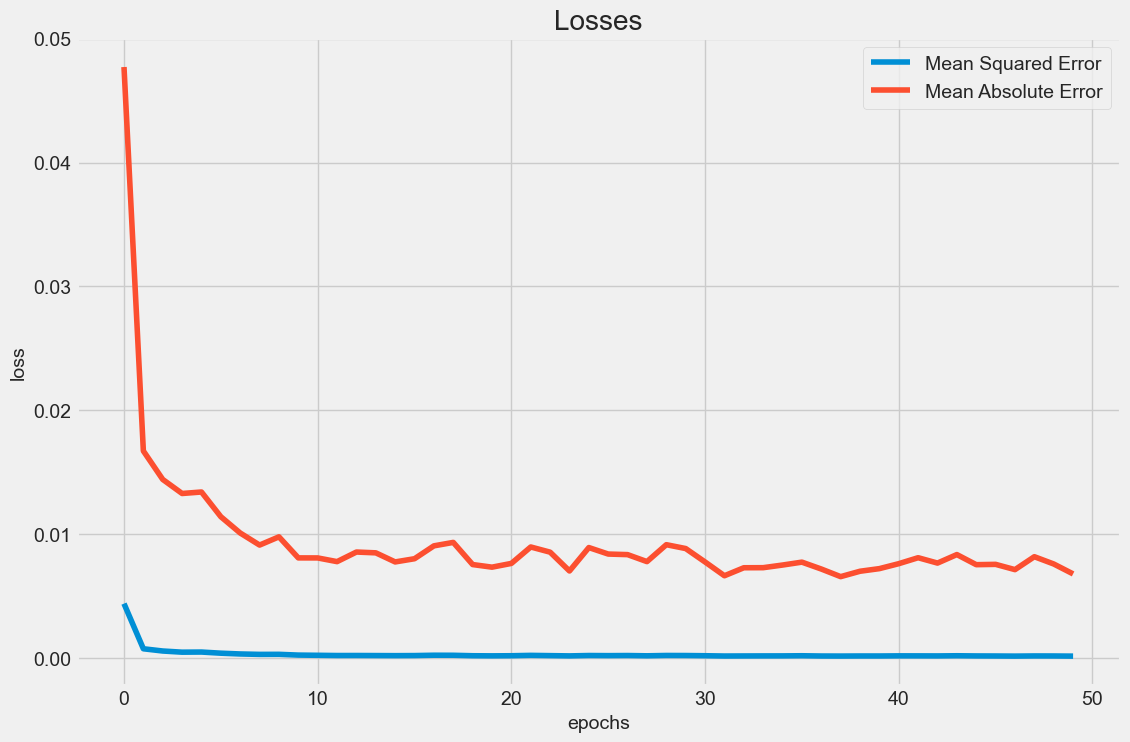

In [58]:
plt.figure(figsize=(12, 8))
plt.plot(history.history["loss"])
plt.plot(history.history["mean_absolute_error"])
plt.legend(['Mean Squared Error','Mean Absolute Error'])
plt.title("Losses")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

In [59]:
#prediction

In [60]:
# Creating a testing set with 60 time-steps and 1 output
time_steps = 100
test_data = scaled_data[train_size - time_steps:, :]

x_test = []
y_test = []
n_cols = 1

for i in range(time_steps, len(test_data)):
    x_test.append(test_data[i-time_steps:i, 0:n_cols])
    y_test.append(test_data[i, 0:n_cols])
x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], n_cols))

In [61]:
x_test.shape , y_test.shape

((220, 100, 1), (220, 1))

In [62]:
# Get Prediction
predictions = model.predict(x_test)

7/7 [==============================] - 2s 35ms/step


In [63]:
#inverse predictions scaling
predictions = scaler.inverse_transform(predictions)
predictions.shape

(220, 1)

In [64]:
#root mean square error

In [65]:
#inverse y_test scaling
y_test = scaler.inverse_transform(y_test)

RMSE = np.sqrt(np.mean( y_test - predictions )**2).round(2)
RMSE

304.27

In [66]:
preds_acts = pd.DataFrame(data={'Predictions':predictions.flatten(), 'Actuals':y_test.flatten()})
preds_acts

,Predictions,Actuals
0,401.630005,442.97
1,412.603790,424.08
2,418.208038,423.43
3,420.113556,434.36
4,422.062592,429.14
...,...,...
215,1137.777954,1725.07
216,1132.724976,1797.55
217,1157.124634,1897.71
218,1210.304321,1854.54


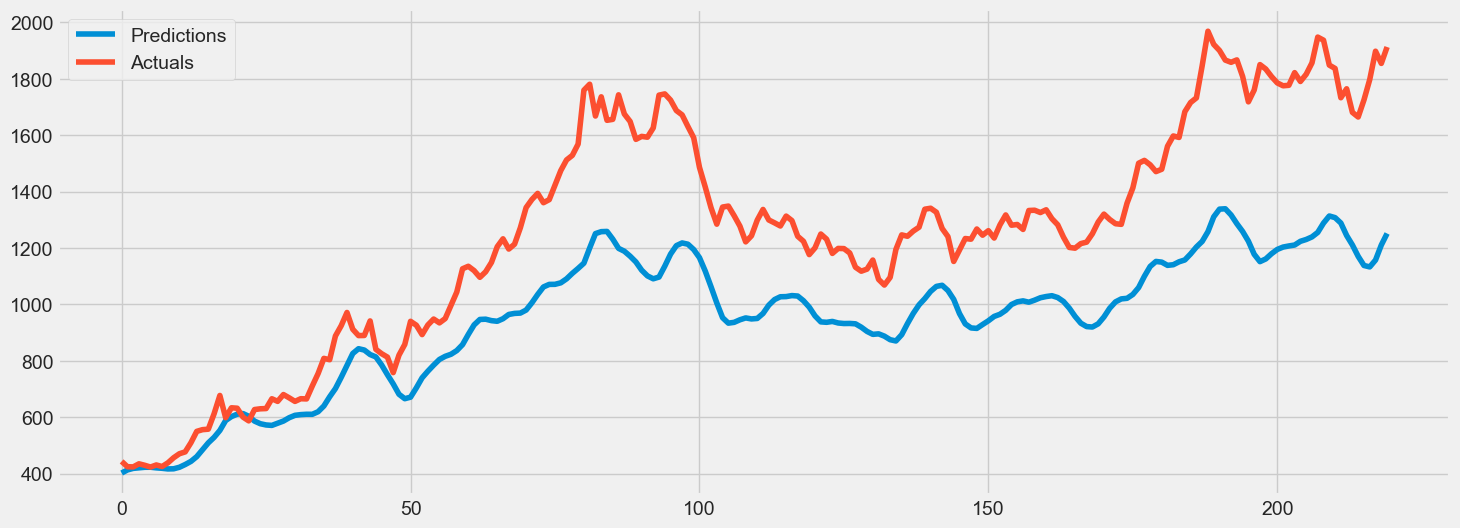

In [67]:
plt.figure(figsize = (16, 6))
plt.plot(preds_acts['Predictions'])
plt.plot(preds_acts['Actuals'])
plt.legend(['Predictions', 'Actuals'])
plt.show()

In [68]:
#Visualize prediction with the data

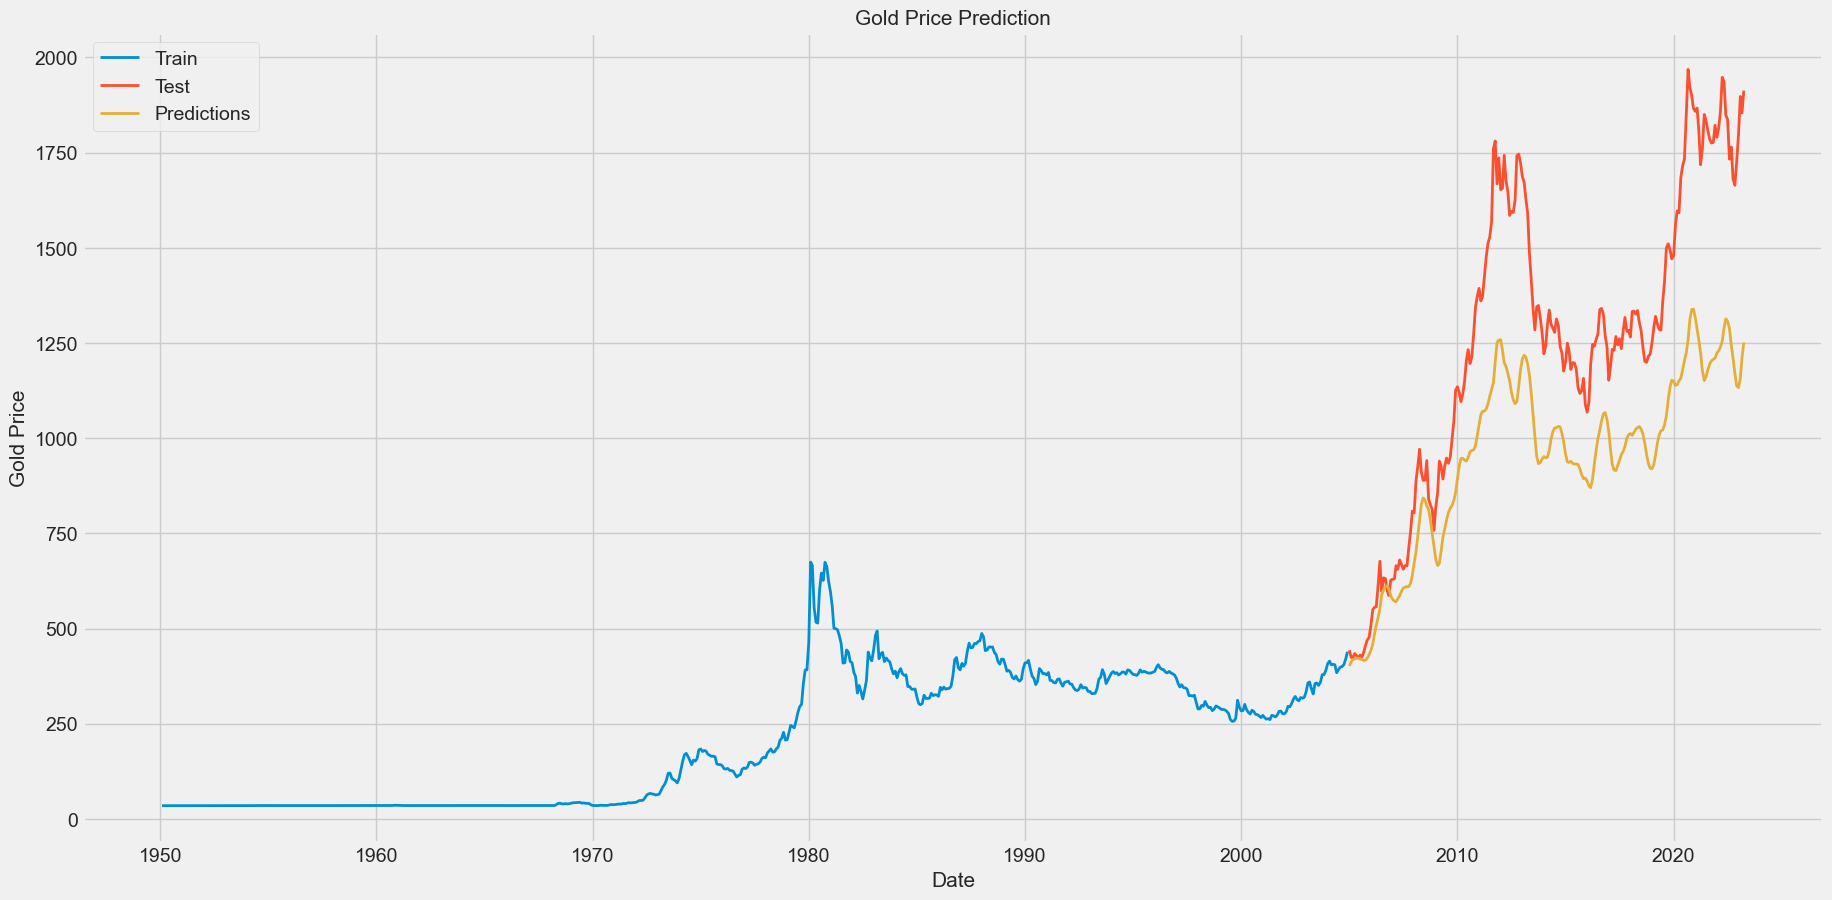

In [69]:
train = dataset.iloc[:train_size , 0:1]
test = dataset.iloc[train_size: , 0:1]
test['Predictions'] = predictions

plt.figure(figsize= (20, 10))
plt.title('Gold Price Prediction', fontsize= 15)
plt.xlabel('Date', fontsize= 15)
plt.ylabel('Gold Price', fontsize= 15)
plt.plot(train['Price'], linewidth= 2)
plt.plot(test['Price'], linewidth= 2)
plt.plot(test["Predictions"], linewidth= 2)
plt.legend(['Train', 'Test', 'Predictions'])

# ARIMA

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [71]:
# Function to test stationarity
def test_stationarity(timeseries):
    from statsmodels.tsa.stattools import adfuller
    print("Dickey-Fuller Test Results:")
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput[f'Critical Value ({key})'] = value
    print(dfoutput)

In [72]:
# Test for stationarity
test_stationarity(dt['Price'])

Dickey-Fuller Test Results:
Test Statistic                   0.622498
p-value                          0.988157
#Lags Used                      11.000000
Number of Observations Used    867.000000
Critical Value (1%)             -3.437915
Critical Value (5%)             -2.864879
Critical Value (10%)            -2.568548
dtype: float64


#### The data is not stationary, apply differencing to make it stationary (useful for ARIMA models)
#### Uncomment the following line if needed:

In [74]:
dt['Price_diff'] = dt['Price'].diff().dropna()

In [76]:
# ARIMA Model
# Define the order of the ARIMA model (p, d, q)
p, d, q = 1, 1, 1

# Create the ARIMA model
model = ARIMA(dt['Price_diff'], order=(p, d, q))

# Fit the ARIMA model to the data
model_fit = model.fit()

In [77]:
# Forecast future values
forecast_steps = 36  # Change this to the number of steps you want to forecast ahead
forecast_diff = model_fit.forecast(steps=forecast_steps)


In [78]:
# Create a date range for the forecasted data
forecast_dates = pd.date_range(start=dt.index[-1], periods=forecast_steps + 1, closed='right')

# Revert differencing to get the forecast on the original scale
forecast = dt['Price'].iloc[-1] + forecast_diff.cumsum()

In [79]:
# Print the forecasted values
print("Forecasted Values:")
print(forecast)


Forecasted Values:
2023-04-30    1928.121250
2023-05-31    1934.673240
2023-06-30    1939.399651
2023-07-31    1943.749023
2023-08-31    1948.020526
2023-09-30    1952.275946
2023-10-31    1956.528044
2023-11-30    1960.779456
2023-12-31    1965.030727
2024-01-31    1969.281968
2024-02-29    1973.533203
2024-03-31    1977.784437
2024-04-30    1982.035671
2024-05-31    1986.286905
2024-06-30    1990.538138
2024-07-31    1994.789372
2024-08-31    1999.040606
2024-09-30    2003.291840
2024-10-31    2007.543073
2024-11-30    2011.794307
2024-12-31    2016.045541
2025-01-31    2020.296774
2025-02-28    2024.548008
2025-03-31    2028.799242
2025-04-30    2033.050476
2025-05-31    2037.301709
2025-06-30    2041.552943
2025-07-31    2045.804177
2025-08-31    2050.055410
2025-09-30    2054.306644
2025-10-31    2058.557878
2025-11-30    2062.809111
2025-12-31    2067.060345
2026-01-31    2071.311579
2026-02-28    2075.562813
2026-03-31    2079.814046
Freq: M, Name: predicted_mean, dtype: float64

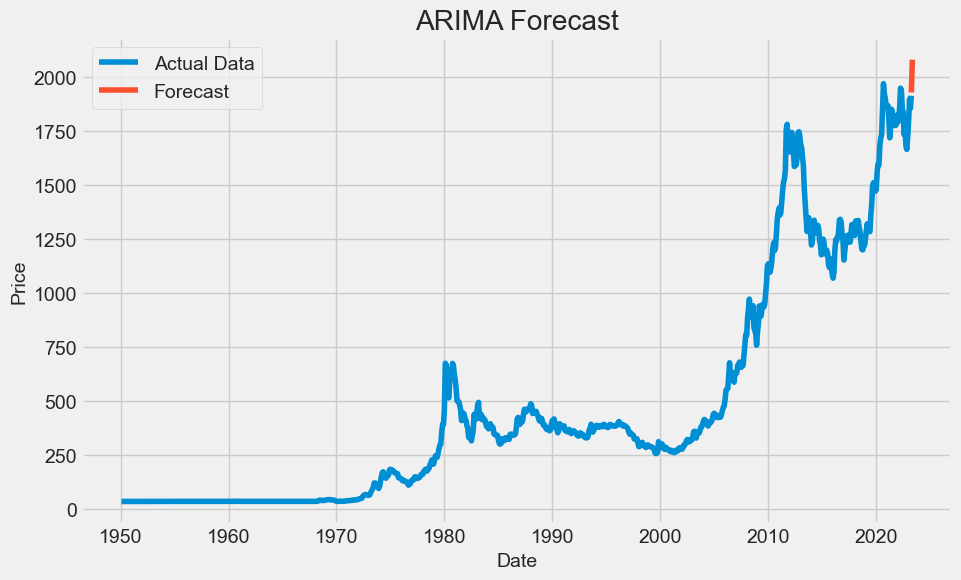

In [80]:
# Visualize the forecast on the original date graph
plt.figure(figsize=(10, 6))
plt.plot(dt['Price'], label='Actual Data')
plt.plot(forecast_dates, forecast, label='Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('ARIMA Forecast')
plt.legend()
plt.show()